In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib.animation import FuncAnimation

# 10.1

$u_{t} + au_{x} = 0, \ 0 \leq x \leq 10,\ 0\leq t\leq 9$

$u(0, t) = 0, \ u(1, t) = 0, \ u(x, 0) = \sin(2\pi x / 10)$

Точное решение: $u(x, t) = \dfrac{1}{x^2+2t+1}$

Используем:

a) схему Лакса

$
\dfrac{y_{m}^{n+1}-0.5\left(y_{m+1}^{n}+y_{m-1}^{n}\right)}{\tau}+a \dfrac{y_{m+1}^{n}-y_{m-1}^{n}}{2 h}=0
$

б) схему Лакса-Вендроффа

$
\dfrac{y_{m}^{n+1}-y_{m}^{n}}{\tau}+a \dfrac{y_{m+1}^{n}-y_{m-1}^{n}}{2 h}-\dfrac{a^{2} \tau}{2} \dfrac{y_{m+1}^{n}-2 y_{m}^{n}+y_{m-1}^{n}}{h^{2}}=0
$

In [2]:
def solve_lax(tau, h, a):
    
    x = np.linspace(0, 10, int(10/h), dtype='double')
    t = np.linspace(0, 9, int(9/tau), dtype='double')

    N = len(t)
    M = len(x)

    y = np.empty([N, M], dtype='double')
    
    for i in range(M):
        y[0][i] = np.sin(2*np.pi * x[i] / 10)
        
    for i in range(N):
        y[i][0] = -np.sin(2*np.pi * t[i] / 10)
        y[i][M-1] = -np.sin(2*np.pi * t[i] / 10)

    for n in range(0, N-1):
        for m in range(1, M-1):
            y[n+1][m] = 1/2 * (y[n][m + 1] + y[n][m - 1]) - a * tau / (2*h) * (y[n][m+1]-y[n][m-1])

    return y, x, t, N, M

In [3]:
def solve_lax_vendr(tau, h, a):
    
    x = np.linspace(0, 10, int(10/h), dtype='double')
    t = np.linspace(0, 9, int(9/tau), dtype='double')

    N = len(t)
    M = len(x)

    y = np.empty([N, M], dtype='double')
    
    for i in range(M):
        y[0][i] = np.sin(2*np.pi * x[i] / 10)

    for i in range(N):
        y[i][0] = -np.sin(2*np.pi * t[i] / 10)
        y[i][M-1] = -np.sin(2*np.pi * t[i] / 10)

    for n in range(0, N-1):
        for m in range(1, M-1):
            y[n+1][m] = y[n][m] - a * tau / (2*h) * (y[n][m+1]-y[n][m-1]) + a**2 * tau**2 / (2 * h**2) * (y[n][m+1] - 2*y[n][m] + y[n][m-1])
    return y, x, t, N, M

In [17]:
def real_sol(x, t, a):
    return np.sin(2*np.pi * (x-a*t) / 10)

In [18]:
def plot_n(n, y1, y2):
    plt.clf()
    plt.title(f"График функции при t = {t[n]:.3f}")
    plt.xlabel("x")
    plt.ylabel("u")
    
    plt.plot(x, y1[n], label='решение схемой Лакса')
    plt.plot(x, y2[n], label='решение схемой Лакса-Вендроффа')
    plt.plot(x, real_sol(x, t[n], 1), label='реальное решение')
    plt.legend()
    
    return plt

In [19]:
y_lax, x, t, N, M = solve_lax(10/101, 10/101, 1)
y_lax_ven, _, _, _, _ = solve_lax_vendr(10/101, 10/101, 1)

<IPython.core.display.Javascript object>


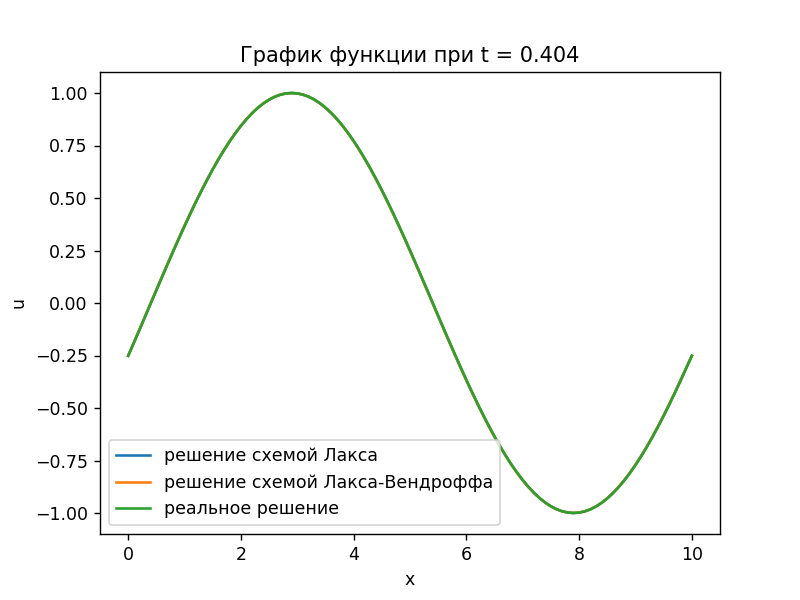

In [20]:
%matplotlib notebook

num_frames = 500
def animate(n):
    n = int(n / num_frames * N)
    plot_n(n, y_lax, y_lax_ven)
    
anim = anime.FuncAnimation(plt.figure(), animate, interval = 20, frames = num_frames, repeat = False)
plt.show()

Теперь проверим реальную сходимость схем: сравним как меняется ошибка при фиксированном числе куранта при сгущении сеток вдвое

In [62]:
def err_lax(sigma, N):
    y_lax, x, t, N, M = solve_lax(sigma*10/N, 10/N, 1)
    err = np.empty_like(y_lax, dtype='double')
    
    for i in range(len(y_lax)):
        for j in range(len(y_lax[0])):
            err[i][j] = np.abs(y_lax[i][j] - real_sol(x[j],t[i], 1))
    return np.amax(err)

def err_lax_ven(sigma, N):
    y_lax_ven, x, t, N, M = solve_lax_vendr(sigma*10/N, 10/N, 1)
    err = np.empty_like(y_lax_ven, dtype='double')
    
    for i in range(len(y_lax_ven)):
        for j in range(len(y_lax_ven[0])):
            err[i][j] = np.abs(y_lax_ven[i][j] - real_sol(x[j],t[i], 1))
    return np.amax(err)

In [63]:
sigma = np.array([1, 0.6, 0.3])
N = np.array([101, 202, 404])
error_lax = np.empty([len(sigma), len(N)], dtype=np.float64)
error_lax_ven = np.empty([len(sigma), len(N)], dtype=np.float64)

for i in range(len(sigma)):
    for j in range(len(N)):
        error_lax[i][j] = err_lax(sigma[i], N[j])
        error_lax_ven[i][j] = err_lax_ven(sigma[i], N[j])

<IPython.core.display.Javascript object>


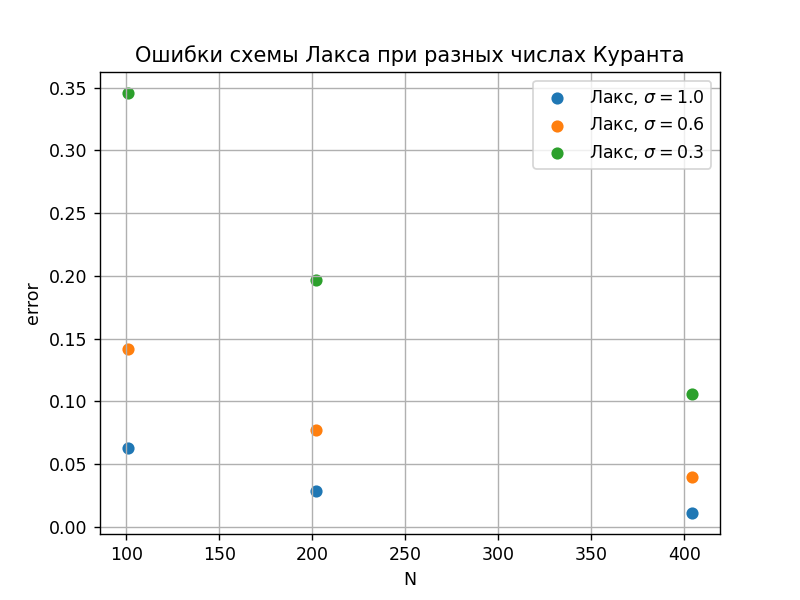

In [64]:
for i in range(len(sigma)):
    plt.scatter(N, error_lax[i], label='Лакс, $\sigma=$' + str(sigma[i]))
plt.xlabel('N')
plt.ylabel('error')
plt.title('Ошибки схемы Лакса при разных числах Куранта')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


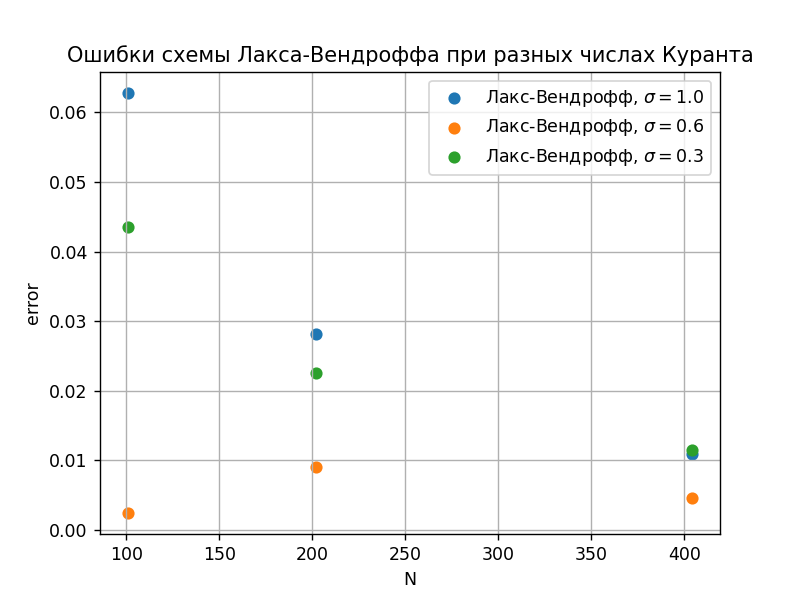

In [65]:
for i in range(len(sigma)):
    plt.scatter(N, error_lax_ven[i], label='Лакс-Вендрофф, $\sigma=$' + str(sigma[i]))
plt.xlabel('N')
plt.ylabel('error')
plt.title('Ошибки схемы Лакса-Вендроффа при разных числах Куранта')
plt.grid()
plt.legend()
plt.show()